<a href="https://colab.research.google.com/github/vidhi-sys/PyTorch_DeepLearning_TensorFlow/blob/main/Neural_Network_Classification02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

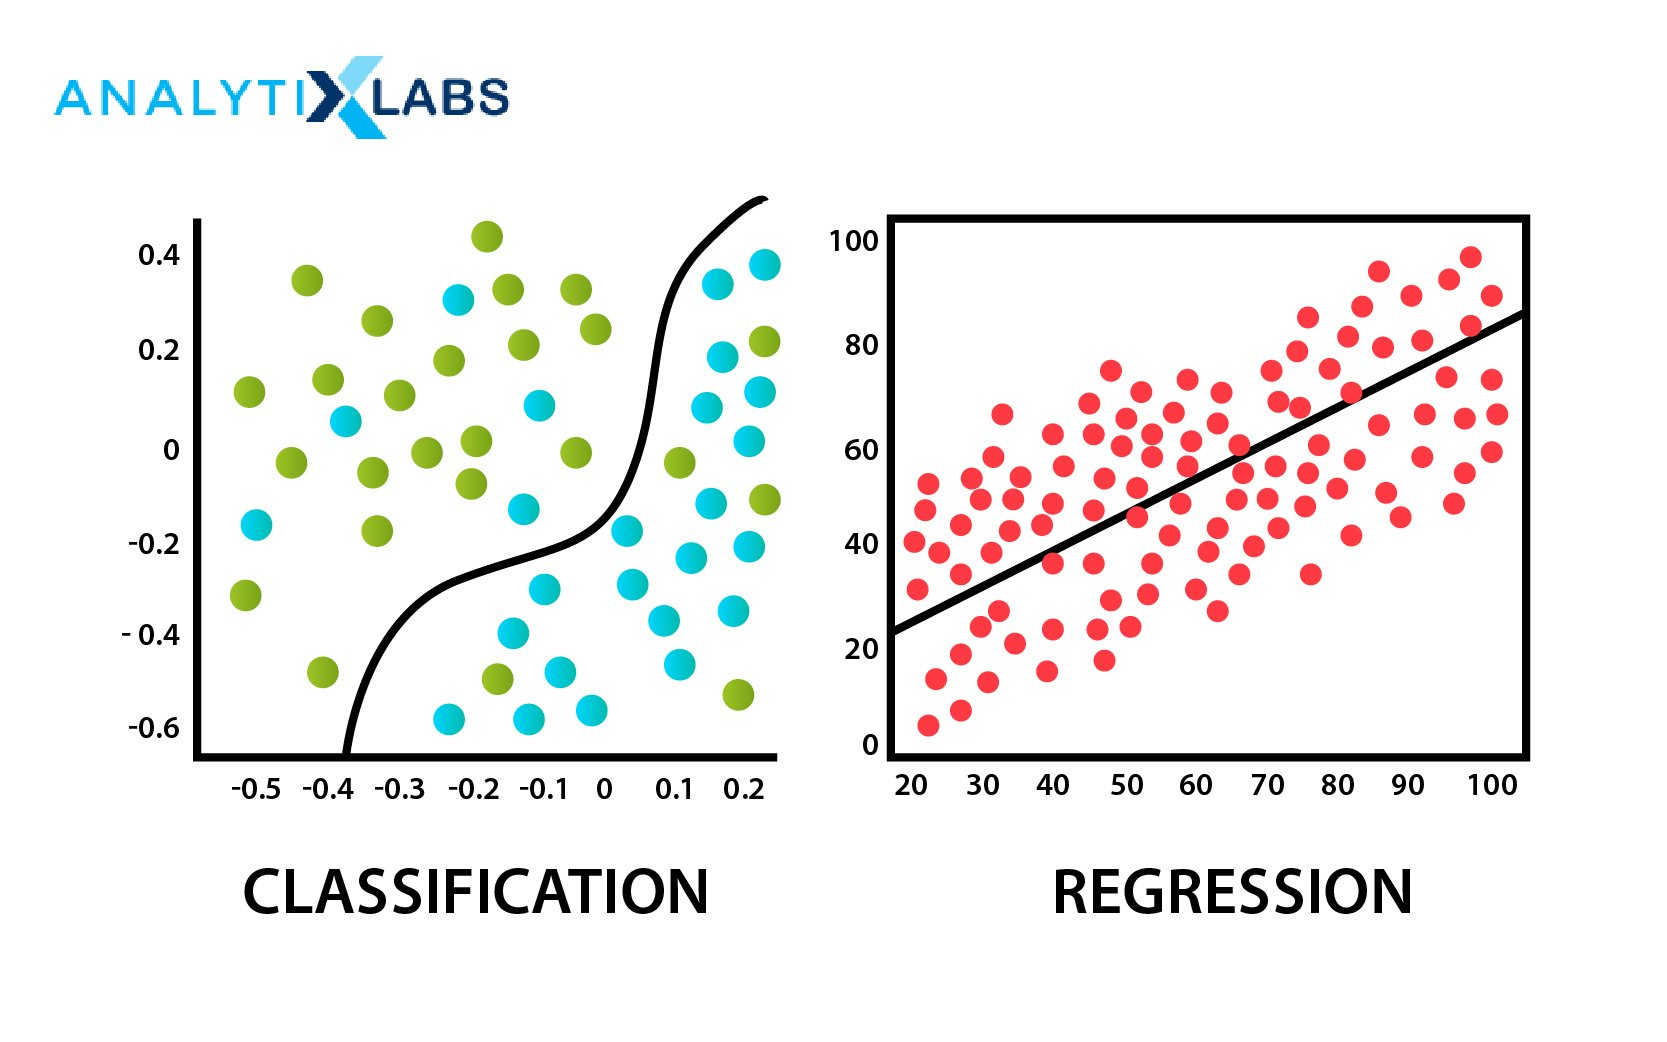

`Multilabel and Multiclass Classification`
[Read Here](https://www.geeksforgeeks.org/machine-learning/multiclass-classification-vs-multi-label-classification/)

# **Creating a Toy Dataset for Classification**
dataset small enough to try and sizeable enough to practise
[Read Here](https://share.google/iZEcF1O3ajMlzTWcM)

In [1]:
import sklearn
from sklearn.datasets import make_circles
n=1000
x,y=make_circles(n,noise=0.07,random_state=20)

In [2]:
print(x[:5])
print(y[:5])

[[ 0.16789593 -0.7325304 ]
 [-0.59157698  0.57238417]
 [-0.64071383 -0.46789784]
 [-0.31429141  0.95099971]
 [-0.12843425 -0.85072118]]
[1 1 1 0 1]


In [3]:
import pandas as pd
import numpy as np
circles=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})
circles.head()

,x1,x2,label
0,0.167896,-0.732530,1
1,-0.591577,0.572384,1
2,-0.640714,-0.467898,1
3,-0.314291,0.951000,0
4,-0.128434,-0.850721,1


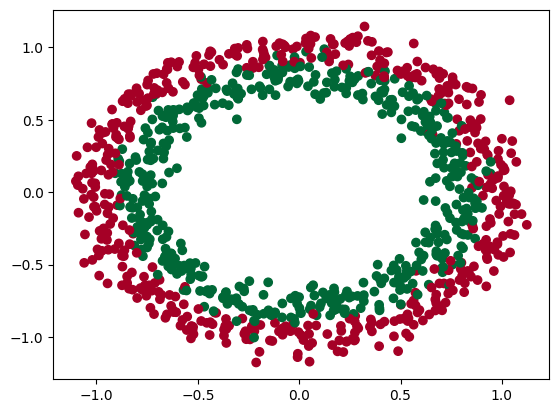

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlGn)

**Turning into Tensors and More**

In [5]:
#check shape
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


In [6]:
#view first example of features and labels
x_sample=x[0]
y_sample=y[0]
print(f"values for one sample of x:{x_sample} and same for y :{y_sample}")

values for one sample of x:[ 0.16789593 -0.7325304 ] and same for y :1


In [7]:
import torch
torch.__version__

'2.8.0+cu126'

In [8]:


# Check if x and y are already tensors before converting
if not isinstance(x, torch.Tensor):
    x = torch.from_numpy(x).type(torch.float)
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float)

print(x[:5])
print(y[:5])

tensor([[ 0.1679, -0.7325],
        [-0.5916,  0.5724],
        [-0.6407, -0.4679],
        [-0.3143,  0.9510],
        [-0.1284, -0.8507]])
tensor([1., 1., 1., 0., 1.])


**Test-Train Split**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
torch.manual_seed(42)

In [11]:
len(x_train),len(x_test)

(800, 200)

**Building a Model**

In [12]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
# subclass nn.module
class circle_model01(nn.Module):
  def __init__(self):
    super().__init__()
    #creating 2 nn linear layers capable of handling shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
    #instantiate an instance of our model class and send it to target device




In [14]:
device


'cuda'

In [15]:
model_0=circle_model01().to(device)
model_0

circle_model01(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

[**Visualize**](https://playground.tensorflow.org/)

In [16]:
# using nn.sequential replicate
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)


In [17]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

**Loss Optimizer and Evaluation Functions**


*   BCE Loss
*   BCE with Logit Loss


[What are Logits ? ](https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean)

In [18]:
#cross entropy or binary cross entropy
loss_fn=nn.BCEWithLogitsLoss()
# creating an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [19]:
# evaluation metrics/function
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc


In [23]:
y_logits = model_0(x_train.to(device))
# Access the first element of the second dimension (index 0)
print(y_logits[:, 0])

tensor([ 1.2908e-01,  2.7142e-01,  1.4881e-01,  1.8256e-01,  3.0372e-01,
        -9.7142e-02,  2.3882e-01,  3.1513e-02, -1.0088e-02,  3.1565e-01,
        -5.0653e-02,  3.0478e-01, -1.3637e-02,  3.0512e-01,  8.1708e-02,
         2.6526e-01, -8.5792e-02, -9.2201e-02,  1.3851e-01,  2.8160e-01,
        -7.2123e-02, -2.9091e-02, -5.9553e-02,  2.7133e-01,  9.4551e-02,
         1.2222e-01,  1.8141e-01,  1.4196e-01,  1.8040e-01,  2.5035e-01,
         1.2006e-01, -6.1264e-02,  2.9509e-01,  3.0252e-01,  2.2052e-01,
         4.6300e-02,  9.1194e-02, -8.7536e-03,  5.0718e-02,  9.4699e-02,
        -7.0263e-02,  3.1327e-01,  2.9899e-01,  1.3386e-02,  1.5274e-01,
        -3.8994e-02,  3.0541e-01,  2.3546e-01,  2.3883e-01,  1.1524e-01,
        -6.6328e-02,  2.3282e-01,  3.3200e-01,  1.3442e-01,  2.0147e-01,
         1.5200e-01,  2.6168e-01,  2.0471e-01,  2.2613e-01,  3.3897e-01,
         5.1781e-02, -4.8406e-03,  2.6164e-01,  1.8100e-01,  3.4590e-01,
         1.4228e-01,  2.6191e-01,  5.3072e-02, -2.8

In [26]:
y_preds_prob=torch.sigmoid(y_logits)
y_preds_prob

tensor([[0.5322],
        [0.5674],
        [0.5371],
        [0.5455],
        [0.5754],
        [0.4757],
        [0.5594],
        [0.5079],
        [0.4975],
        [0.5783],
        [0.4873],
        [0.5756],
        [0.4966],
        [0.5757],
        [0.5204],
        [0.5659],
        [0.4786],
        [0.4770],
        [0.5346],
        [0.5699],
        [0.4820],
        [0.4927],
        [0.4851],
        [0.5674],
        [0.5236],
        [0.5305],
        [0.5452],
        [0.5354],
        [0.5450],
        [0.5623],
        [0.5300],
        [0.4847],
        [0.5732],
        [0.5751],
        [0.5549],
        [0.5116],
        [0.5228],
        [0.4978],
        [0.5127],
        [0.5237],
        [0.4824],
        [0.5777],
        [0.5742],
        [0.5033],
        [0.5381],
        [0.4903],
        [0.5758],
        [0.5586],
        [0.5594],
        [0.5288],
        [0.4834],
        [0.5579],
        [0.5822],
        [0.5336],
        [0.5502],
        [0

In [31]:
y_preds=torch.round(y_preds_prob)
y_preds_label=torch.round(torch.sigmoid(model_0(x_test.to(device))))

y_preds.squeeze()

tensor([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 

**Building a Training Loop**

In [34]:
torch.manual_seed(42)
epochs=200
x_train,y_train=x_train.to(device),y_train.to(device)
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(x_test.to(device)).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test.to(device)) # calculate test loss
    test_acc=accuracy_fn(y_true=y_test.to(device),y_pred=test_pred) # calculate test accuracy
    if(epoch)%10==0:

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69829, Accuracy: 0.53% | Test loss: 0.69086, Test acc: 0.53%
Epoch: 10 | Loss: 0.69532, Accuracy: 0.52% | Test loss: 0.69305, Test acc: 0.48%
Epoch: 20 | Loss: 0.69411, Accuracy: 0.50% | Test loss: 0.69474, Test acc: 0.49%
Epoch: 30 | Loss: 0.69355, Accuracy: 0.49% | Test loss: 0.69586, Test acc: 0.50%
Epoch: 40 | Loss: 0.69325, Accuracy: 0.48% | Test loss: 0.69654, Test acc: 0.47%
Epoch: 50 | Loss: 0.69308, Accuracy: 0.48% | Test loss: 0.69693, Test acc: 0.47%
Epoch: 60 | Loss: 0.69297, Accuracy: 0.47% | Test loss: 0.69715, Test acc: 0.46%
Epoch: 70 | Loss: 0.69290, Accuracy: 0.47% | Test loss: 0.69727, Test acc: 0.45%
Epoch: 80 | Loss: 0.69285, Accuracy: 0.45% | Test loss: 0.69733, Test acc: 0.41%
Epoch: 90 | Loss: 0.69282, Accuracy: 0.44% | Test loss: 0.69735, Test acc: 0.39%
Epoch: 100 | Loss: 0.69279, Accuracy: 0.43% | Test loss: 0.69736, Test acc: 0.39%
Epoch: 110 | Loss: 0.69277, Accuracy: 0.46% | Test loss: 0.69735, Test acc: 0.40%
Epoch: 120 | Loss: 0.69276,

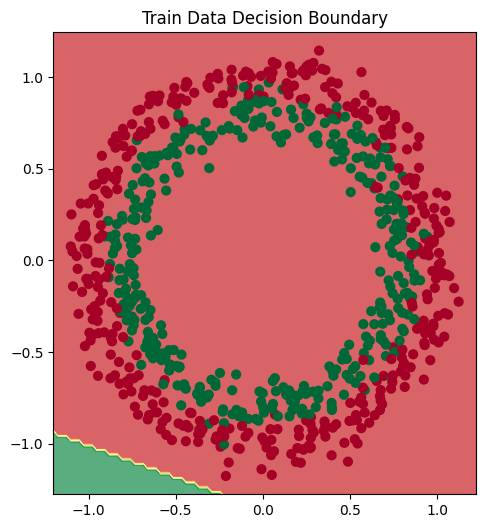

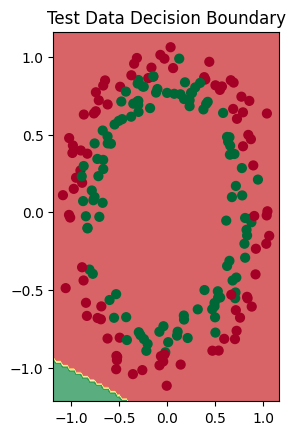

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Data Decision Boundary")
plot_decision_boundary(model_0, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data Decision Boundary")
plot_decision_boundary(model_0, x_test, y_test)
plt.show()